# Вариант 22

In [1]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt
dt = 0.001

системы 1 и 3

## Система 1.9

In [2]:
k_m = 0.3574
k_e = 0.3574
J = 0.0024
R = 4.6808
T = k_e*k_m / (J*R)

In [3]:
sec = 10
time = np.linspace(0, sec, int(sec/dt))

In [4]:
y_ir = T / k_e * np.exp(-T*time)
y_sr = 1 / k_e *(1 - np.exp(-T*time))

In [5]:
ss = ct.canonical_form(
    ct.tf2ss(
        [T/k_e],
        [1, T]
    ),
    'reachable'
)[0]

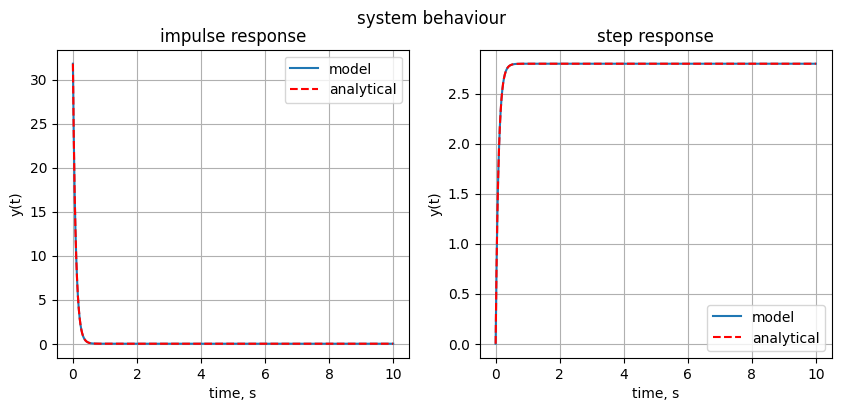

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))

fig.suptitle("system behaviour")

ax[0].set_title("impulse response")
ax[0].plot(time, ct.impulse_response(ss, time).outputs, label="model")
ax[0].plot(time, y_ir, "r--", label="analytical")
ax[0].grid(True)
ax[0].set_xlabel("time, s")
ax[0].set_ylabel("y(t)")
ax[0].legend()

ax[1].set_title("step response")
ax[1].plot(time, ct.step_response(ss, time).outputs, label="model")
ax[1].plot(time, y_sr, "r--", label="analytical")
ax[1].grid(True)
ax[1].set_xlabel("time, s")
ax[1].set_ylabel("y(t)")
ax[1].legend()

In [7]:
freqs = np.linspace(10**-6,stop=10**3,num=100000)

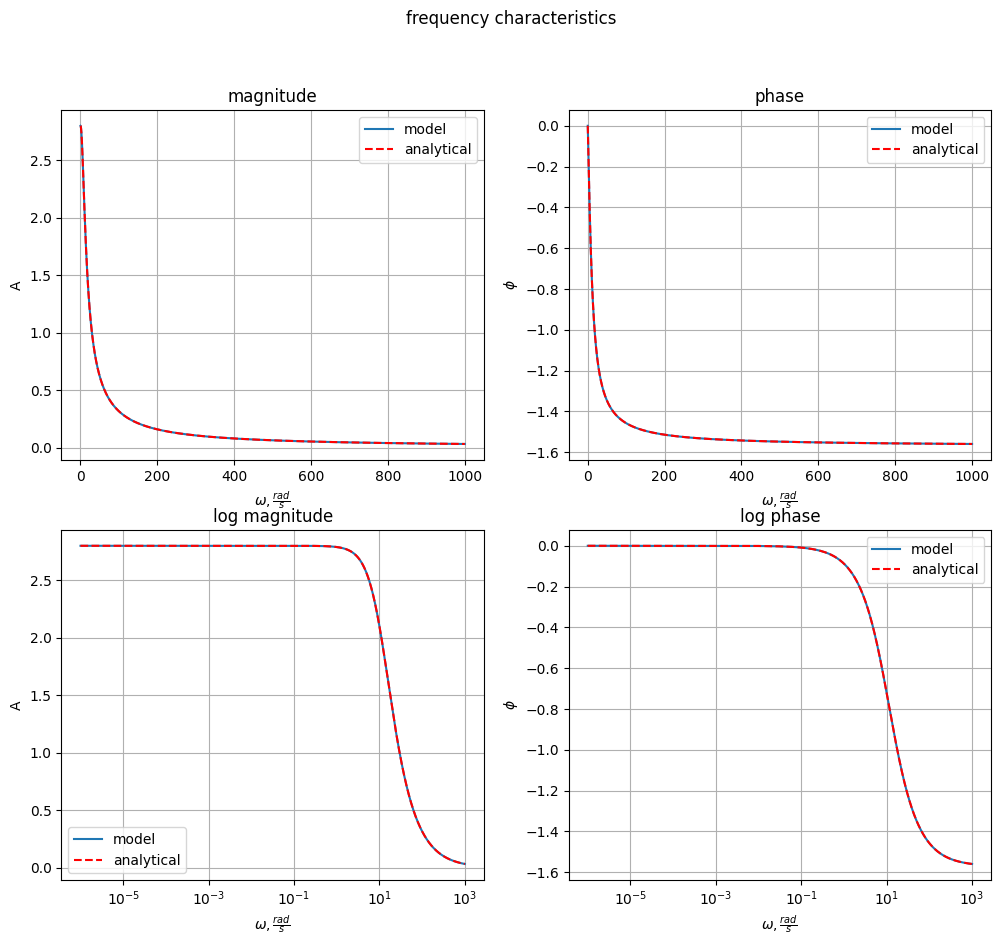

In [8]:
mag, phase, _ = ct.bode(ss, freqs, plot=False)

A = T / k_e / np.sqrt(T**2 + freqs**2)
phi = np.arctan(- freqs / T)

fig, ax = plt.subplots(2, 2, figsize=(12,10))

fig.suptitle("frequency characteristics")

ax[0,0].set_title("magnitude")
ax[0,0].plot(freqs, mag, label="model")
ax[0,0].plot(freqs, A, "r--", label="analytical")
ax[0,0].set_xlabel(r"$\omega, \frac {rad} {s}$")
ax[0,0].set_ylabel("A")
ax[0,0].grid(True)
ax[0,0].legend()

ax[0,1].set_title("phase")
ax[0,1].plot(freqs, phase, label="model")
ax[0,1].plot(freqs, phi, "r--", label="analytical")
ax[0,1].set_xlabel(r"$\omega, \frac {rad} {s}$")
ax[0,1].set_ylabel(r"$\phi$")
ax[0,1].grid(True)
ax[0,1].legend()
ax[1,0].set_title("log magnitude")
ax[1,0].plot(freqs, mag, label="model")
ax[1,0].plot(freqs, A, "r--", label="analytical")
ax[1,0].grid(True)
ax[1,0].set_xscale("log")
ax[1,0].set_xlabel(r"$\omega, \frac {rad} {s}$")
ax[1,0].set_ylabel("A")
ax[1,0].legend()

ax[1,1].set_title("log phase")
ax[1,1].plot(freqs, phase, label="model")
ax[1,1].plot(freqs, phi, "r--", label="analytical")
ax[1,1].grid(True)
ax[1,1].set_xscale("log")
ax[1,1].set_xlabel(r"$\omega, \frac {rad} {s}$")
ax[1,1].set_ylabel(r"$\phi$")
ax[1,1].legend()

## Система 3.9

In [9]:
C = 340e-6

In [16]:
sec = 1
time = np.linspace(0, sec, int(sec/dt))

In [17]:
y_ir2 = np.ones_like(time) * 1 / C
y_sr2 = 1 / C * time

In [18]:
ss2 = ct.canonical_form(
    ct.tf2ss(
        [1.],
        [C, 0]
    ),
    'reachable'
)[0]

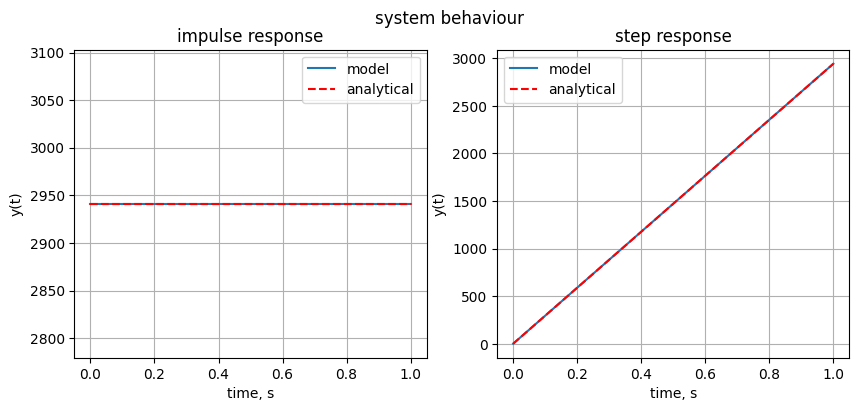

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))

fig.suptitle("system behaviour")

ax[0].set_title("impulse response")
ax[0].plot(time, ct.impulse_response(ss2, time).outputs, label="model")
ax[0].plot(time, y_ir2, "r--", label="analytical")
ax[0].grid(True)
ax[0].set_xlabel("time, s")
ax[0].set_ylabel("y(t)")
ax[0].legend()

ax[1].set_title("step response")
ax[1].plot(time, ct.step_response(ss2, time).outputs, label="model")
ax[1].plot(time, y_sr2, "r--", label="analytical")
ax[1].grid(True)
ax[1].set_xlabel("time, s")
ax[1].set_ylabel("y(t)")
ax[1].legend()

In [23]:
freqs = np.linspace(10**-6,stop=10**3,num=100000)

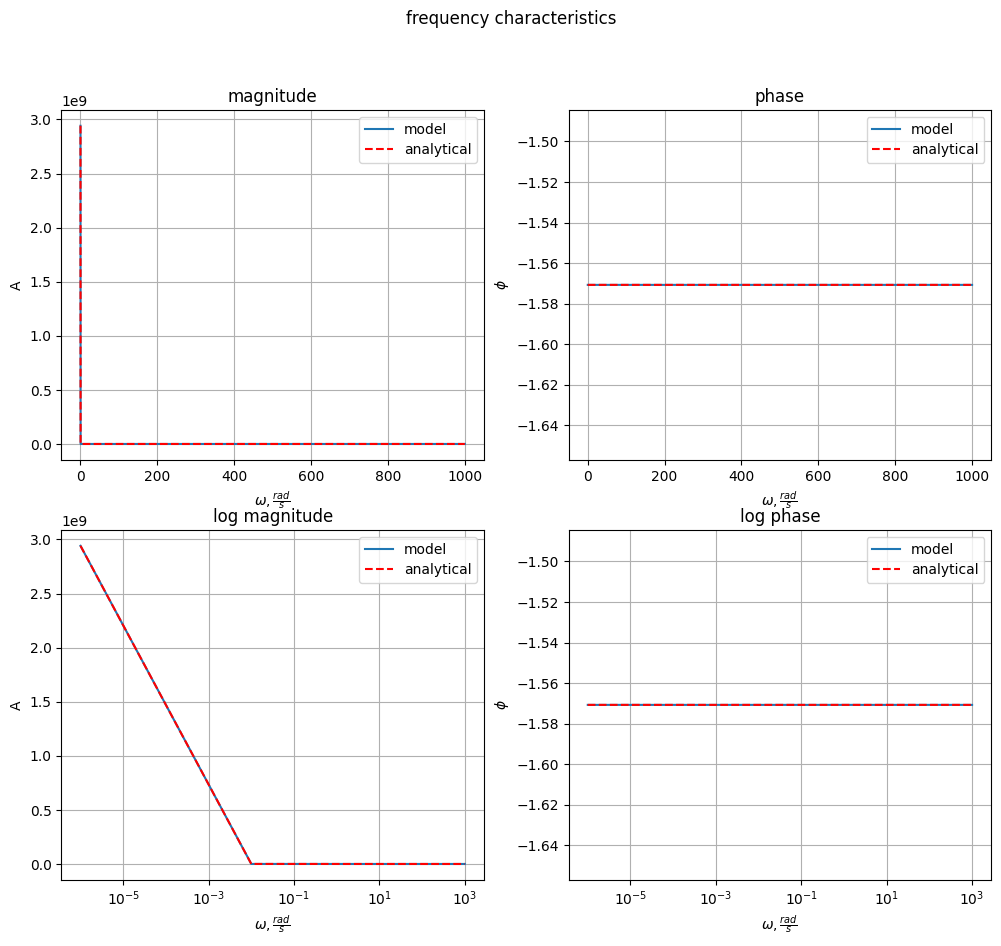

In [26]:
mag, phase, _ = ct.bode(ss2, freqs, plot=False)

A = 1 / (C*freqs)
phi = np.arctan2(- 1 / (C*freqs), 0)

fig, ax = plt.subplots(2, 2, figsize=(12,10))

fig.suptitle("frequency characteristics")

ax[0,0].set_title("magnitude")
ax[0,0].plot(freqs, mag, label="model")
ax[0,0].plot(freqs, A, "r--", label="analytical")
ax[0,0].set_xlabel(r"$\omega, \frac {rad} {s}$")
ax[0,0].set_ylabel("A")
ax[0,0].grid(True)
ax[0,0].legend()

ax[0,1].set_title("phase")
ax[0,1].plot(freqs, phase, label="model")
ax[0,1].plot(freqs, phi, "r--", label="analytical")
ax[0,1].set_xlabel(r"$\omega, \frac {rad} {s}$")
ax[0,1].set_ylabel(r"$\phi$")
ax[0,1].grid(True)
ax[0,1].legend()
ax[1,0].set_title("log magnitude")
ax[1,0].plot(freqs, mag, label="model")
ax[1,0].plot(freqs, A, "r--", label="analytical")
ax[1,0].grid(True)
ax[1,0].set_xscale("log")
ax[1,0].set_xlabel(r"$\omega, \frac {rad} {s}$")
ax[1,0].set_ylabel("A")
ax[1,0].legend()

ax[1,1].set_title("log phase")
ax[1,1].plot(freqs, phase, label="model")
ax[1,1].plot(freqs, phi, "r--", label="analytical")
ax[1,1].grid(True)
ax[1,1].set_xscale("log")
ax[1,1].set_xlabel(r"$\omega, \frac {rad} {s}$")
ax[1,1].set_ylabel(r"$\phi$")
ax[1,1].legend()